In [ ]:
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt

In [ ]:
t_set = pd.read_csv('train.csv')

In [ ]:
t_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
t_set.shape

(1258, 6)

In [ ]:
#Numpy Array
training_set=t_set.iloc[:,1:2].values

Feature Scaling (Normalization)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
Nor = MinMaxScaler(feature_range=(0,1))
scaled_training_set = Nor.fit_transform(training_set) 

In [ ]:
scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
X_train=[]
y_train=[]
for i in range(70,1258):
  X_train.append(scaled_training_set[i-70:i, 0])
  y_train.append(scaled_training_set[i, 0])

In [ ]:
X_train,y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train,y_train.shape

(array([[0.08581368, 0.09701243, 0.09433366, ..., 0.06782499, 0.06823424,
         0.07601012],
        [0.09701243, 0.09433366, 0.09156187, ..., 0.06823424, 0.07601012,
         0.08082819],
        [0.09433366, 0.09156187, 0.07984225, ..., 0.07601012, 0.08082819,
         0.05807724],
        ...,
        [0.917665  , 0.91130292, 0.91811147, ..., 0.95475854, 0.95204256,
         0.95163331],
        [0.91130292, 0.91811147, 0.93176576, ..., 0.95204256, 0.95163331,
         0.95725128],
        [0.91811147, 0.93176576, 0.94402485, ..., 0.95163331, 0.95725128,
         0.93796041]]), (1188,))

Reshaping

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 1))

# Model Builiding

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regression = Sequential()

Fist Layer and dropout regularization

In [ ]:
regression.add(LSTM(units = 60, return_sequences=True, input_shape = (X_train.shape[1], 1) ))


In [ ]:
regression.add(Dropout(0.2))

Second Layer


In [ ]:
regression.add(LSTM(units = 60, return_sequences=True ))
regression.add(Dropout(0.2))

3rd Layer


In [ ]:
regression.add(LSTM(units = 60, return_sequences=True ))
regression.add(Dropout(0.2))

4th Layer

In [ ]:
regression.add(LSTM(units = 60 ))
regression.add(Dropout(0.2))

Output Layer

In [ ]:
regression.add(Dense(units = 1))

In [ ]:
regression.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 70, 60)            14880     
                                                                 
 dropout (Dropout)           (None, 70, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 70, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 70, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 70, 60)            29040     
                                                                 
 dropout_2 (Dropout)         (None, 70, 60)            0         
                                                                 
 lstm_3 (LSTM)               (None, 60)                2

Compiling  

In [ ]:
regression.compile(optimizer='adam', loss = 'mean_squared_error')

In [ ]:
regression.fit(X_train, y_train, epochs = 120, batch_size = 32)

Epoch 1/120
38/38 [==============================] - 12s 134ms/step - loss: 0.0341
Epoch 2/120
38/38 [==============================] - 5s 137ms/step - loss: 0.0062
Epoch 3/120
38/38 [==============================] - 5s 137ms/step - loss: 0.0055
Epoch 4/120
38/38 [==============================] - 5s 132ms/step - loss: 0.0057
Epoch 5/120
38/38 [==============================] - 5s 134ms/step - loss: 0.0049
Epoch 6/120
38/38 [==============================] - 5s 131ms/step - loss: 0.0048
Epoch 7/120
38/38 [==============================] - 5s 140ms/step - loss: 0.0045
Epoch 8/120
38/38 [==============================] - 5s 136ms/step - loss: 0.0047
Epoch 9/120
38/38 [==============================] - 5s 133ms/step - loss: 0.0048
Epoch 10/120
38/38 [==============================] - 5s 130ms/step - loss: 0.0043
Epoch 11/120
38/38 [==============================] - 5s 132ms/step - loss: 0.0038
Epoch 12/120
38/38 [==============================] - 5s 135ms/step - loss: 0.0035
Epoch 13/120

In [ ]:
dataset_test = pd.read_csv('test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
  dataset_total = pd.concat((t_set['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 70:].values
inputs = inputs.reshape(-1,1)
inputs = Nor.transform(inputs)
X_test = []
for i in range(70, 90):
    X_test.append(inputs[i-70:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regression.predict(X_test)
predicted_stock_price = Nor.inverse_transform(predicted_stock_price)

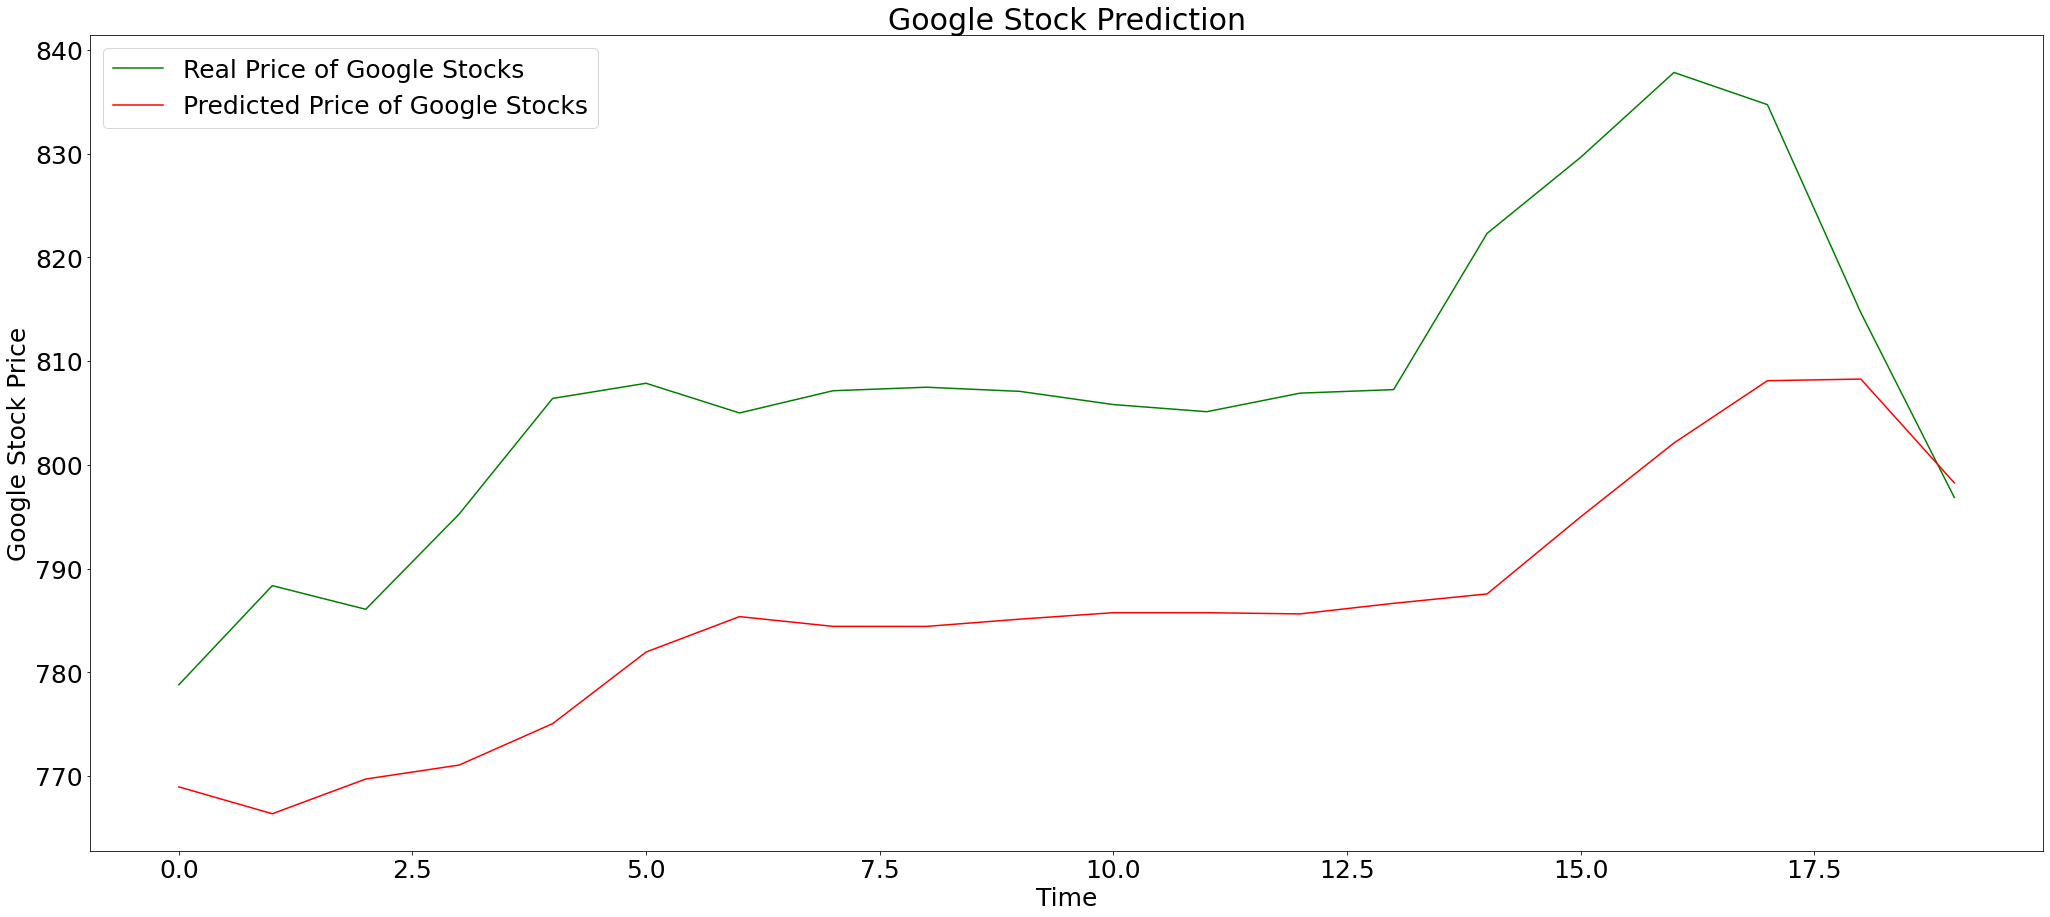

In [ ]:
import matplotlib
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 25}

matplotlib.rc('font', **font)
plt.figure(figsize=(35,15))
plt.plot(real_stock_price, color = 'green', label = 'Real Price of Google Stocks')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Price of Google Stocks')
plt.title('Google Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()